# IMPORT PACKAGES

In [6]:
import xarray as xr
import pandas as pd
import numpy as np

# CONSECUTIVE WET/DRY DAYS FUNCTION

In [7]:
# Consecutive Wet/Dry Days Function
def consecutive(da, thresh=1, cum_type='cdd'):
    count = 0; overall_counter = []
    for i,j in enumerate(da):
        if cum_type == 'cwd':
            count = count+1 if da[i] >= thresh else 0
        elif cum_type == 'cdd':
            count = count+1 if da[i] < thresh else 0
        overall_counter.append(count)
    return max(overall_counter)



# APPLY TO MULTI-DIMENSIONAL DATA (.nc FILE)

In [18]:
Data = xr.open_dataset('rainfall.nc').pr * 86400
years = list( set( Data['time.year'].values ) )

#Create a New Blank Array of Dimension Similar to the Spatial Grids and Time Aggregation ('Yearly') Grids
size = list(Data.shape); size[0] = len(years)
cwd = np.zeros(size)
cdd = np.zeros(size)

for i, yr in enumerate(years):
    for a in np.arange(cwd.shape[1]):
        for b in np.arange(cwd.shape[2]):
            cwd[i,a,b] = consecutive( Data.sel(time=str(yr))[:,a,b].values, thresh=1, cum_type='cwd' )
            cdd[i,a,b] = consecutive( Data.sel(time=str(yr))[:,a,b].values, thresh=1, cum_type='cdd' )

# Parse CWD/CDD output (array) to Xarray DataArray

In [19]:
cwd

array([[[ 50.,  27.,  41.,  28., 101.,  60.],
        [ 72.,  62.,  54.,  65.,  31.,  34.],
        [ 37.,  36.,  53.,  26.,  26.,  35.],
        ...,
        [ 11.,  20.,  12.,  14.,  19.,  10.],
        [ 11.,   7.,  11.,  13.,  10.,   4.],
        [  5.,   5.,   7.,   5.,   6.,   4.]],

       [[ 27.,  21.,  21.,  30.,  35.,  77.],
        [ 23.,  17.,  20.,  18.,  25.,  26.],
        [ 29.,  29.,  21.,  21.,  21.,  46.],
        ...,
        [  8.,   8.,  10.,  13.,   5.,   6.],
        [  8.,   6.,   7.,   5.,   5.,   5.],
        [  6.,  12.,   8.,   8.,   3.,   5.]],

       [[ 44.,  40.,  39.,  42.,  41.,  58.],
        [ 39.,  35.,  34.,  38.,  41.,  37.],
        [ 69.,  63.,  47.,  47.,  30.,  45.],
        ...,
        [ 11.,  17.,   7.,   9.,   9.,  15.],
        [ 10.,   8.,   5.,   7.,   6.,  10.],
        [  4.,   5.,   8.,   6.,   2.,   3.]],

       ...,

       [[ 16.,  21.,  27.,  28.,  28.,  47.],
        [ 31.,  30.,  60.,  37.,  51.,  38.],
        [ 38.,  35.,  

In [20]:
#CWD DataArray
new_CWD = xr.DataArray(data=cwd,
     dims=list(Data.dims),
     coords=dict(
         lon= Data.lon,
         lat=Data.lat,
         time=pd.to_datetime(years, format='%Y'),
     ),
    name = 'CWD',
     attrs=dict(
         description="Consecutive Wet Days",
         units="days",
     ),
)



# CDD DataArray
new_CDD = xr.DataArray(data=cdd,
     dims=list(Data.dims),
     coords=dict(
         lon= Data.lon,
         lat=Data.lat,
         time=pd.to_datetime(years, format='%Y'),
     ),
    name = 'CDD',
     attrs=dict(
         description="Consecutive Dry Days",
         units="days",
     ),
)


In [21]:
new_CWD

<xarray.DataArray 'CWD' (time: 165, lat: 12, lon: 6)>
array([[[ 50.,  27.,  41.,  28., 101.,  60.],
        [ 72.,  62.,  54.,  65.,  31.,  34.],
        [ 37.,  36.,  53.,  26.,  26.,  35.],
        ...,
        [ 11.,  20.,  12.,  14.,  19.,  10.],
        [ 11.,   7.,  11.,  13.,  10.,   4.],
        [  5.,   5.,   7.,   5.,   6.,   4.]],

       [[ 27.,  21.,  21.,  30.,  35.,  77.],
        [ 23.,  17.,  20.,  18.,  25.,  26.],
        [ 29.,  29.,  21.,  21.,  21.,  46.],
        ...,
        [  8.,   8.,  10.,  13.,   5.,   6.],
        [  8.,   6.,   7.,   5.,   5.,   5.],
        [  6.,  12.,   8.,   8.,   3.,   5.]],

       [[ 44.,  40.,  39.,  42.,  41.,  58.],
        [ 39.,  35.,  34.,  38.,  41.,  37.],
        [ 69.,  63.,  47.,  47.,  30.,  45.],
        ...,
...
        ...,
        [ 11.,   9.,   5.,  13.,  11.,   9.],
        [  7.,   5.,   5.,   7.,   6.,   8.],
        [  4.,   5.,   5.,   4.,   2.,   3.]],

       [[ 83.,  39.,  42.,  43.,  61.,  40.],
        [ 71.,  73.,  44.,  54.,  32.,  42.],
        [ 79.,  79.,  86.,  66.,  87., 131.],
        ...,
        [  8.,  21.,  21.,  12.,  17.,   6.],
        [  8.,   9.,   5.,   6.,   6.,   5.],
        [  6.,   5.,   4.,   4.,   4.,   3.]],

       [[ 32.,  40.,  49.,  50.,  26.,  58.],
        [ 52.,  31.,  27.,  29.,  33.,  50.],
        [ 51.,  34.,  28.,  47.,  42.,  42.],
        ...,
        [ 12.,  13.,   8.,  10.,  10.,  13.],
        [ 10.,   6.,   8.,   5.,   3.,   4.],
        [  5.,   5.,   8.,   4.,   3.,   2.]]])
Coordinates:
  * lon      (lon) float64 -4.688 -2.812 -0.9375 0.9375 2.812 4.688
  * lat      (lat) float64 0.625 1.875 3.125 4.375 ... 10.62 11.88 13.12 14.38
  * time     (time) datetime64[ns] 1850-01-01 1851-01-01 ... 2014-01-01
Attributes:
    description:  Consecutive Wet Days
    units:        days

# VISUALIZATION

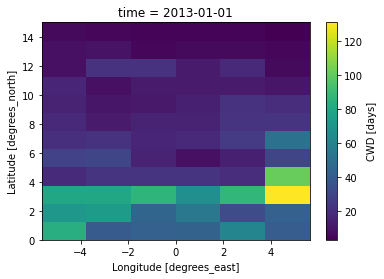

In [25]:
new_CWD.sel(time='2013').plot()

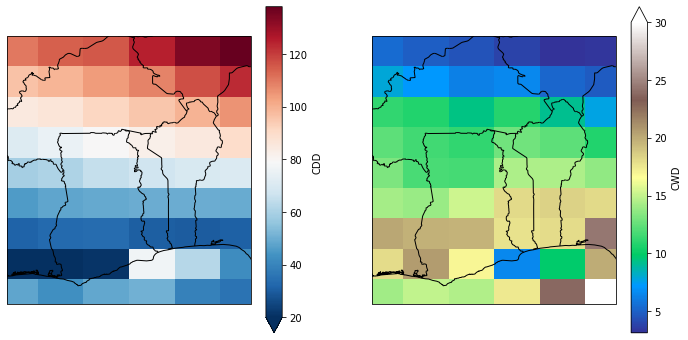

In [5]:
import cartopy as cp
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, figsize=(12,6), subplot_kw={'projection':cp.crs.PlateCarree()})
new_CDD.mean('time').plot(cmap='RdBu_r', ax = axes[0], vmin=20)
axes[0].coastlines()
axes[0].add_feature(cp.feature.BORDERS)
axes[0].set_extent([-5,5,4,15])


new_CWD.mean('time').plot(cmap='terrain', ax = axes[1], vmax=30)
axes[1].coastlines()
axes[1].add_feature(cp.feature.BORDERS)
axes[1].set_extent([-5,5,4,15])
